In [4]:
import numpy as np
import scipy as sp
import skimage
import matplotlib.pyplot as plt
import imageio
from glob import glob
from USresamplingutils import *

In [6]:
data_paths = sorted(glob("./.data/*"))

In [7]:
data_paths

['./.data/video_001.mp4', './.data/video_002.mp4']

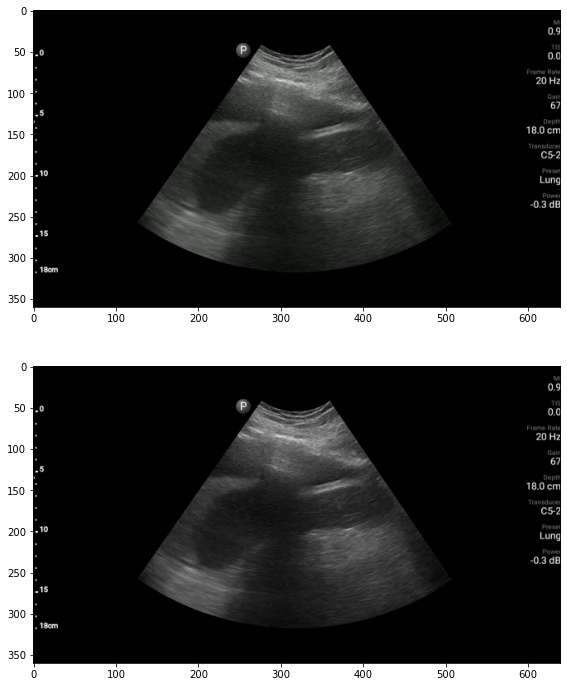

In [30]:
ims = np.zeros((2,360,640,3))

for i in range(len(data_paths)):
    vid = imageio.get_reader(data_paths[i], 'ffmpeg')
    ims[i] = vid.get_data(30)
    
ims = ims / 255

fig, axs = plt.subplots(2)
fig.set_size_inches(15,12)

axs[0].imshow(ims[1])

ocimg = np.mean(ims[1], axis=2)
axs[1].imshow(ocimg, cmap = 'gray')
plt.show()

## Actual Example of code

In [9]:
mask = get_US_mask_from_image(ocimg)
img_mapping = get_rectilinear_resampling_map(mask, ray_density = 2/3, blur = 0.3)
resampled_img = get_resampled_image_from_mapping(ocimg, img_mapping)

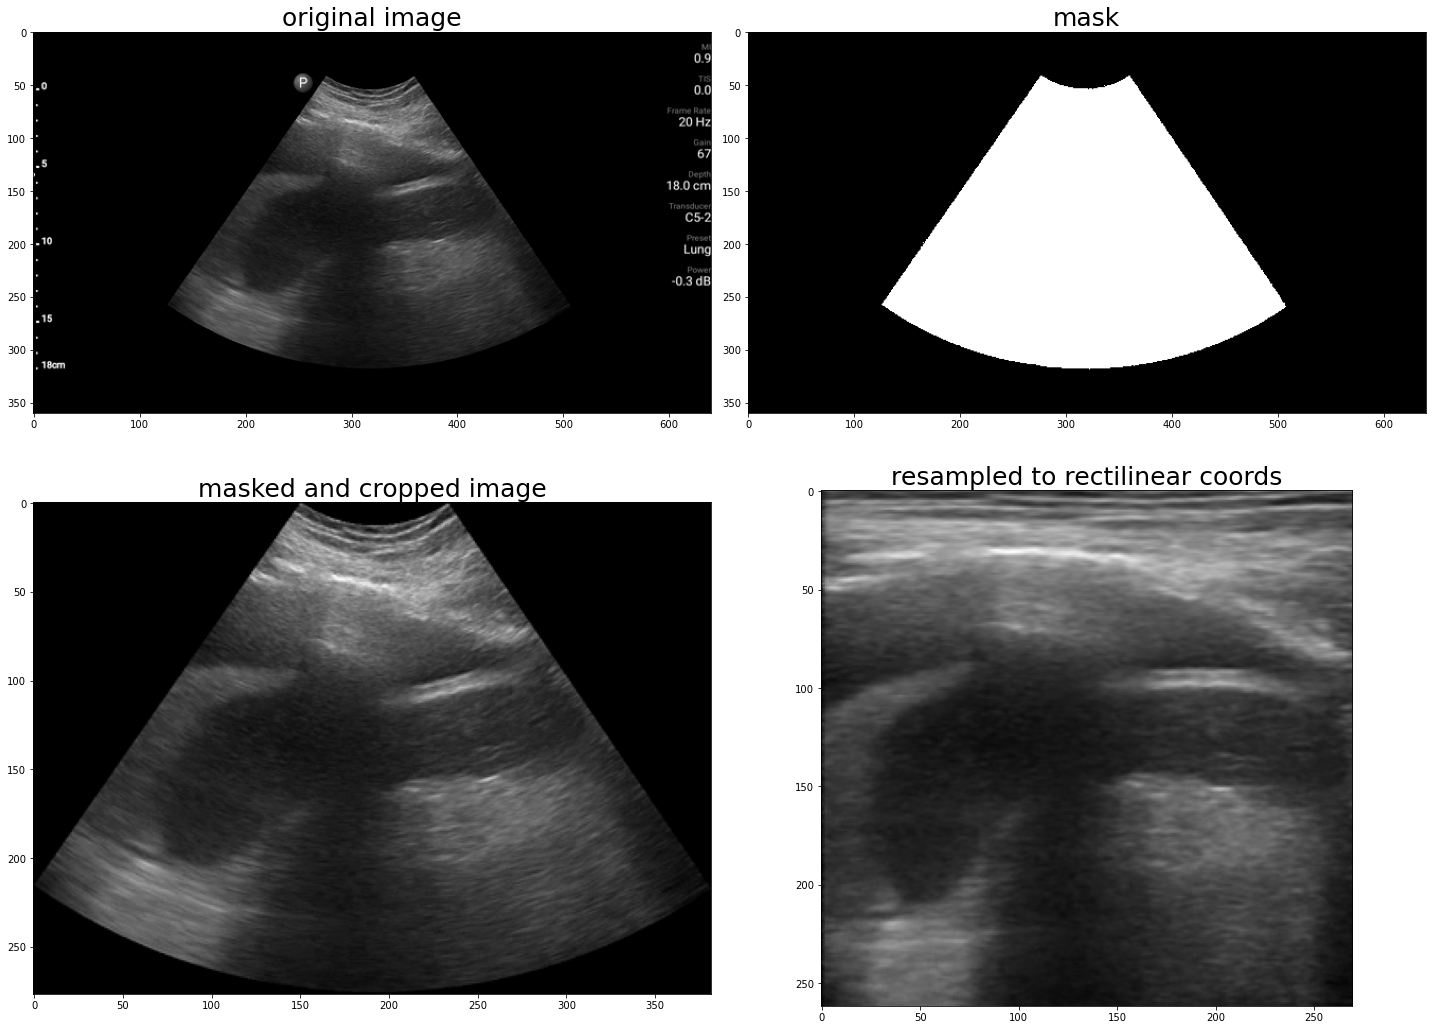

In [10]:
masked_img = np.zeros(np.shape(ocimg))
masked_img[mask] = ocimg[mask]

true_points = np.argwhere(masked_img)
top_left = true_points.min(axis=0)
bottom_right = true_points.max(axis=0)
cropped_masked_img = masked_img[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]+1]

fig, axs = plt.subplots(2,2)
fig.set_size_inches(20,15)
axs[0,0].imshow(ocimg, cmap='gray')
axs[0,1].imshow(mask, cmap='gray')
axs[1,0].imshow(cropped_masked_img, cmap='gray')
axs[1,1].imshow(resampled_img, cmap='gray')

axs[0,0].set_title("original image", fontsize = 25)
axs[0,1].set_title("mask", fontsize = 25)
axs[1,0].set_title("masked and cropped image", fontsize = 25)
axs[1,1].set_title("resampled to rectilinear coords", fontsize = 25)

plt.tight_layout()

In [56]:
data_path = './.data/video_001.mp4'

vid = imageio.get_reader(data_path, 'ffmpeg')
frames = []
resampled_frames = []

for i, im in enumerate(vid):
    ocimg = np.mean(im, axis=2)
    masked_img = np.zeros(np.shape(ocimg))
    masked_img[mask] = ocimg[mask]
    true_points = np.argwhere(masked_img)
    top_left = true_points.min(axis=0)
    bottom_right = true_points.max(axis=0)
    cropped_masked_img = masked_img[top_left[0]:bottom_right[0]+1,
                                    top_left[1]:bottom_right[1]+1]
    frames.append(cropped_masked_img)
    resampled_img = get_resampled_image_from_mapping(ocimg, img_mapping)
    resampled_frames.append(resampled_img)
    
#     fig, axs = plt.subplots(1,2)
#     fig.set_size_inches(10,15)
#     axs[0].imshow(ocimg, cmap='gray')
#     axs[1].imshow(resampled_img, cmap='gray')
    
#     plt.tight_layout()    
    
num_frames = i + 1

In [25]:
!mkdir ./.gif_frames/

mkdir: cannot create directory ‘./.gif_frames/’: File exists


/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

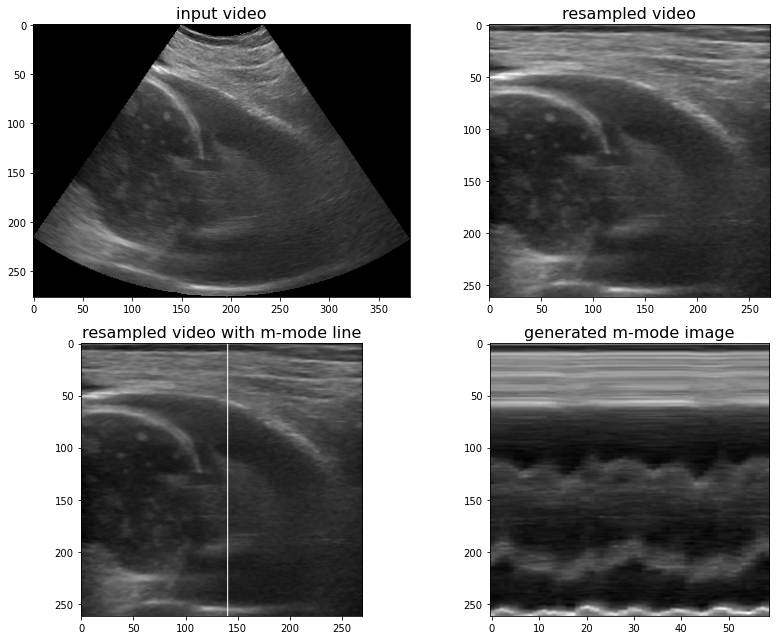

In [77]:
mmode_line_coord = 140
mmode_img = np.zeros((resampled_frames[i].shape[0], num_frames))

for i in range(len(frames)):    
    frame = frames[i]
    res_frame = resampled_frames[i]
    res_frame_line = res_frame.copy()
    res_frame_line[:,mmode_line_coord] = (np.ones(res_frame_line.shape[0]) * 255.0)
    mmode_img[:,i] = res_frame[:,mmode_line_coord]
    
    plt.clf()
    fig, axs = plt.subplots(2,2)
    fig.set_size_inches(12,9)
    axs[0,0].imshow(frame, cmap='gray')
    axs[0,1].imshow(res_frame, cmap='gray')
    axs[1,0].imshow(res_frame_line, cmap='gray')
    axs[1,1].imshow(mmode_img, cmap='gray', aspect=0.22)

    axs[0,0].set_title("input video", fontsize = 16)
    axs[0,1].set_title("resampled video", fontsize = 16)
    axs[1,0].set_title("resampled video with m-mode line", fontsize = 16)
    axs[1,1].set_title("generated m-mode image", fontsize = 16)

    plt.tight_layout()
    fname = './.gif_frames/' + f'frame_{i}_.png'
    plt.savefig(fname)
    
    

In [79]:
with imageio.get_writer('./mmode_generation.gif', mode='I') as writer:
    for i in range(num_frames):
        writer.append_data(imageio.imread('./.gif_frames/' + f'frame_{i}_.png'))